In [8]:
import os   
ctpath = r"/pub/data/yangdeq/CLIP/data/vein/15_vein_artery/imagesTr_ori"
labelpath = r"/pub/data/yangdeq/CLIP/data/vein/15_vein_artery/labelsTr_ori"
test_lb_path = r"/pub/data/yangdeq/CLIP/data/vein/15_vein_artery/test_labelsTr_ori"
# for file in os.listdir(ctpath):
#     name = file.split('_0000')[0]+".nii.gz"
    

## read the h5 file and check uniqueness

In [9]:
import os
import h5py
import numpy as np
path = r"/pub/data/yangdeq/Flare2024/26_FLARE2024/wrong_converted_post_label"
for file in os.listdir(path):
    ##read h5 file
    h5file = h5py.File(os.path.join(path,file),'r')
    # print(np.unique(h5file['post_label']))
    print(file)
    break

MSD_lung_064.h5


In [10]:
data = np.array(h5file['post_label'])
np.where(data==1)

(array([0, 0, 0, ..., 0, 0, 0]),
 array([47, 47, 47, ..., 47, 47, 47]),
 array([45, 45, 45, ..., 79, 79, 79]),
 array([129, 129, 130, ..., 142, 143, 143]),
 array([123, 124, 122, ..., 122, 121, 122]))

## create the data split code


In [10]:
base_dir = r"/pub/data/yangdeq/Flare2024"
write_ct_path = r"26_FLARE2024/imagesTr/"
write_label_path = r"26_FLARE2024/converted_label/"
write_unlabel_path = r"26_FLARE2024/converted_unlabel/"

with open('/home/yangdq/project/module/CLIP-Driven-Universal-Model_FLARE2024/dataset/FLARE2024_list/Flare_train.txt', 'a+') as f:
    for file in os.listdir(os.path.join(base_dir, write_unlabel_path)):
        # name = file.split('_0000')[0]+".nii.gz"
        name = file.split('.nii.gz')[0]+"_0000.nii.gz"

        ct_name = os.path.join(write_ct_path, name)
        label_name = os.path.join(write_unlabel_path, file)
        print(ct_name,"   ", label_name)
        # if name not in os.listdir(labelpath):
        f.write(f"{ct_name}\t{label_name}\n")

26_FLARE2024/imagesTr/MSD_liver_127_0000.nii.gz     26_FLARE2024/converted_label/MSD_liver_127.nii.gz
26_FLARE2024/imagesTr/000253_03_01_033-057_0000.nii.gz     26_FLARE2024/converted_label/000253_03_01_033-057.nii.gz
26_FLARE2024/imagesTr/NSCLC-Radiomics_387_0000.nii.gz     26_FLARE2024/converted_label/NSCLC-Radiomics_387.nii.gz
26_FLARE2024/imagesTr/KiTS23_case_00095_0000.nii.gz     26_FLARE2024/converted_label/KiTS23_case_00095.nii.gz
26_FLARE2024/imagesTr/MSD_colon_159_0000.nii.gz     26_FLARE2024/converted_label/MSD_colon_159.nii.gz
26_FLARE2024/imagesTr/000073_02_01_105-121_0000.nii.gz     26_FLARE2024/converted_label/000073_02_01_105-121.nii.gz
26_FLARE2024/imagesTr/KiTS23_case_00298_0000.nii.gz     26_FLARE2024/converted_label/KiTS23_case_00298.nii.gz
26_FLARE2024/imagesTr/MSD_pancreas_140_0000.nii.gz     26_FLARE2024/converted_label/MSD_pancreas_140.nii.gz
26_FLARE2024/imagesTr/MSD_pancreas_311_0000.nii.gz     26_FLARE2024/converted_label/MSD_pancreas_311.nii.gz
26_FLARE2024/i

## merge all the images

In [18]:
import shutil
import SimpleITK as sitk
image_sep = r"/pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr_sep/"
image_ori = r"/pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr/"
S = 0
for names in os.listdir(image_sep):
    for name in os.listdir(os.path.join(image_sep, names)):
        # if name not in os.listdir(image_ori):
        ## copy file to imiage_ori
        if not os.path.exists(os.path.join(image_ori, name)):
            source_file = os.path.join(image_sep,names, name)
            destination_file = os.path.join(image_ori, name)
            # sitk_file = sitk.ReadImage(source_file)
            shutil.copy2(source_file, destination_file)
            print(source_file, "   ", destination_file)

/pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr_sep/15_RSNA/RSNA23_49383_2615_0000.nii.gz     /pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr/RSNA23_49383_2615_0000.nii.gz
/pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr_sep/15_RSNA/RSNA23_23241_9031_0000.nii.gz     /pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr/RSNA23_23241_9031_0000.nii.gz
/pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr_sep/15_RSNA/RSNA23_25894_33269_0000.nii.gz     /pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr/RSNA23_25894_33269_0000.nii.gz
/pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr_sep/15_RSNA/RSNA23_51136_63474_0000.nii.gz     /pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr/RSNA23_51136_63474_0000.nii.gz
/pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr_sep/15_RSNA/RSNA23_52416_54830_0000.nii.gz     /pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr/RSNA23_52416_54830_0000.nii.gz
/pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr_sep/15_RSNA/RSNA23_18905_63415_0000.nii.gz     /pub/data/yangdeq

In [ ]:
import h5py
files = r"/pub/data/yangdeq/CLIP/data/vein/15_vein_artery/post_labelsTr_ori/ZYP2_full.h5"
# files  =r"/pub/data/yangdeq/CLIP/data/amos/09_AMOS/post_labelsTr/amos_0001.h5"
with h5py.File(files, "r") as f:
    # Print all dataset names
    # print("Datasets: ", list(f['post_label']))
    values = f['post_label']
    for i in range(34):
        print((values[0,i,:,:,:] == 255).all())

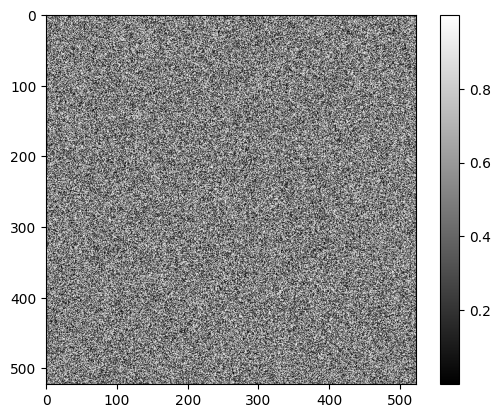

In [1]:
# Assuming 'arr' is your 3D array
# arr = np.random.rand(223, 523, 523)  # replace this with your array
label_s = torch.sum(label[0,-2],dim = 0)
import numpy as np
import matplotlib.pyplot as plt
slice_2d = label_s

# Create a figure and axis
fig, ax = plt.subplots()

# Display the 2D slice
cax = ax.imshow(slice_2d, cmap='gray')

# Add a colorbar
fig.colorbar(cax)

# Show the plot
plt.savefig("/home/yangdq/project/module/CLIP-Driven-Universal-Model/tools/artery.png")
import SimpleITK as sitk
savemask = sitk.GetImageFromArray(pred_hard[0,-1].cpu())
sitk.WriteImage(savemask,r"/home/yangdq/project/module/CLIP-Driven-Universal-Model/tools/artery_jj_pred_hard.nii.gz")

In [121]:
# label = r"/home/yangdq/project/module/CLIP-Driven-Universal-Model/tools/artery_label.nii.gz"
# infer_label =  r"/home/yangdq/project/module/CLIP-Driven-Universal-Model/tools/artery_pred_hard_post.nii.gz"
label = r"/home/yangdq/project/module/CLIP-Driven-Universal-Model/tools/artery_jj_label.nii.gz"
infer_label =  r"/home/yangdq/project/module/CLIP-Driven-Universal-Model/tools/artery_jj_pred_hard.nii.gz"

In [122]:
import SimpleITK as sitk
import numpy as np
import itertools
import cc3d
def count_consecutive_same_values(input_list):
    return [len(list(group)) for key, group in itertools.groupby(input_list)]

# Read the CT image and the right lung label
def compute_mask( infer_label,label):
    infer_label_image = sitk.ReadImage(infer_label)
    label_file_name = label
    label_image = sitk.ReadImage(label_file_name)

    label_array = sitk.GetArrayFromImage(label_image)
    infer_label_array = sitk.GetArrayFromImage(infer_label_image)
    print(label_array.shape)
    label_out = cc3d.connected_components(label_array, connectivity=26)
    sum_row = label_array.sum(axis=1).sum(axis=1)
    binary_array = sum_row > 0
    counter = count_consecutive_same_values(binary_array)
    try:
        # assert len(counter) == 3
        print("counter:", counter)
    except:
        print(f"wrong counter:{counter},label_file_name{label_file_name}")
    
    mx_counter = max(counter)
    right_lung = 0
    # if np.sum(np.logical_not(np.array(counter) >= 256)) >= 1:
    if counter[0] == mx_counter: #right lung
        mask = [3] * 256 + [0] * 256
        right_lung = 1
    elif counter[-1] == mx_counter: #left lung
        mask = [0] * 256 + [3] * 256
    # else:
    #     mask = [0] * 512
    # mask = np.tile(mask, (512,1))

    # full_mask =  np.tile(mask, ( label_array.shape[0],1, 1))

    Depth = label_array.shape[0]
    if right_lung:
    #     ct_array[:, :, :256] = 0
    #     cropped_ct = ct_array
        infer_label_array[:Depth//2, :, :] = 0
        cropped_label = infer_label_array
        print("right lung")

    else:
    #     ct_array[:, :, 256:] = 0
    #     cropped_ct = ct_array
        infer_label_array[Depth//2:, :,:] = 0
        cropped_label = infer_label_array
        print("left lung")
        print(np.unique(cropped_label))
    savemask = sitk.GetImageFromArray(cropped_label)
    sitk.WriteImage(savemask,r"/home/yangdq/project/module/CLIP-Driven-Universal-Model/tools/artery_jj_pred_cut.nii.gz")
    return cropped_label,label_out

In [123]:
cl,out = compute_mask(infer_label,label)

(249, 194, 208)
counter: [56, 58, 135]
left lung
[0 1]


In [118]:
cl.shape

(252, 204, 194)

In [1]:
import torch
import clip
from PIL import Image
import numpy as np
device = "cuda:1" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14@336px", device=device)

image = preprocess(Image.open("/pub/data/yangdeq/CLIP/test_pic/clip2.jpg")).unsqueeze(0).to(device)
text = clip.tokenize([ " juicy peach ", "person","napkin", "dog","apple","peer", "bottle"]).to(device)##nectarine

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()
    # probs = [ i*100 for i in  probs[0]]
print("Label probs:", np.round(probs,1))  

Label probs: [[0.5 0.  0.  0.  0.4 0.  0. ]]


In [2]:
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)
     

Model parameters: 427,944,193
Input resolution: 336
Context length: 77
Vocab size: 49408


In [9]:
p = 0.8
entropy = -p * np.log(p) - (1-p) * np.log(1-p) 
entropy

0.5004024235381879

In [11]:
excit = -np.log(0.1)
excit

2.3025850929940455

In [1]:
dice = {
    "case25_vein_artery/test_labelsTr_ori/ZT0528| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZT0528| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LJZ_2021| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LJZ_2021| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/JJ| artery: 0.7267, ": "artery: dice 0.7267, recall 0.7854, precision 0.6763",
    "case25_vein_artery/test_labelsTr_ori/JJ| artery: 0.7267, vein: 0.7679, ": "vein: dice 0.7679, recall 0.7497, precision 0.7872",
    "case25_vein_artery/test_labelsTr_ori/NLS| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/NLS| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LYY0830| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LYY0830| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/JSY| artery: 0.7211, ": "artery: dice 0.7211, recall 0.7671, precision 0.6805",
    "case25_vein_artery/test_labelsTr_ori/JSY| artery: 0.7211, vein: 0.6057, ": "vein: dice 0.6057, recall 0.6660, precision 0.5555",
    "case25_vein_artery/test_labelsTr_ori/LHQ| artery: 0.6855, ": "artery: dice 0.6855, recall 0.7245, precision 0.6506",
    "case25_vein_artery/test_labelsTr_ori/LHQ| artery: 0.6855, vein: 0.7315, ": "vein: dice 0.7315, recall 0.6953, precision 0.7718",
    "case25_vein_artery/test_labelsTr_ori/YQQ| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/YQQ| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/TY_001| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/TY_001| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HH2049| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HH2049| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZJM0325| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZJM0325| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/JYT| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/JYT| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GJY| artery: 0.6008, ": "artery: dice 0.6008, recall 0.5997, precision 0.6021",
    "case25_vein_artery/test_labelsTr_ori/GJY| artery: 0.6008, vein: 0.5541, ": "vein: dice 0.5541, recall 0.5465, precision 0.5621",
    "case25_vein_artery/test_labelsTr_ori/JJS| artery: 0.7668, ": "artery: dice 0.7668, recall 0.7660, precision 0.7677",
    "case25_vein_artery/test_labelsTr_ori/JJS| artery: 0.7668, vein: 0.6793, ": "vein: dice 0.6793, recall 0.7231, precision 0.6406",
    "case25_vein_artery/test_labelsTr_ori/YY| artery: 0.7502, ": "artery: dice 0.7502, recall 0.7184, precision 0.7851",
    "case25_vein_artery/test_labelsTr_ori/YY| artery: 0.7502, vein: 0.7471, ": "vein: dice 0.7471, recall 0.6928, precision 0.8109",
    "case25_vein_artery/test_labelsTr_ori/YXH| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/YXH| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LLY| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LLY| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZHC| artery: 0.7390, ": "artery: dice 0.7390, recall 0.8297, precision 0.6662",
    "case25_vein_artery/test_labelsTr_ori/ZHC| artery: 0.7390, vein: 0.7178, ": "vein: dice 0.7178, recall 0.7969, precision 0.6530",
    "case25_vein_artery/test_labelsTr_ori/ZHX0518| artery: 0.7387, ": "artery: dice 0.7387, recall 0.7750, precision 0.7058",
    "case25_vein_artery/test_labelsTr_ori/ZHX0518| artery: 0.7387, vein: 0.6986, ": "vein: dice 0.6986, recall 0.7267, precision 0.6727",
    "case25_vein_artery/test_labelsTr_ori/YHM| artery: 0.7005, ": "artery: dice 0.7005, recall 0.7978, precision 0.6244",
    "case25_vein_artery/test_labelsTr_ori/YHM| artery: 0.7005, vein: 0.6882, ": "vein: dice 0.6882, recall 0.7767, precision 0.6179",
    "case25_vein_artery/test_labelsTr_ori/QC| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LZR| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LZR| artery: 0.0000, vein: 0.0048, ": "vein: dice 0.0048, recall 0.0038, precision 0.0066",
    "case25_vein_artery/test_labelsTr_ori/GX| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GX| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CZB| artery: 0.7073, ": "artery: dice 0.7073, recall 0.6493, precision 0.7769",
    "case25_vein_artery/test_labelsTr_ori/CZB| artery: 0.7073, vein: 0.6457, ": "vein: dice 0.6457, recall 0.6316, precision 0.6606",
    "case25_vein_artery/test_labelsTr_ori/HY_2| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HY_2| artery: 0.0000, vein: 0.7049, ": "vein: dice 0.7049, recall 0.5744, precision 0.9123",
    "case25_vein_artery/test_labelsTr_ori/ZXS0526| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZXS0526| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/YQ| artery: 0.7478, ": "artery: dice 0.7478, recall 0.7300, precision 0.7666",
    "case25_vein_artery/test_labelsTr_ori/YQ| artery: 0.7478, vein: 0.7102, ": "vein: dice 0.7102, recall 0.6392, precision 0.7990",
    "case25_vein_artery/test_labelsTr_ori/XMD_2020| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/XMD_2020| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GZX| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GZX| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GXP| artery: 0.7483, ": "artery: dice 0.7483, recall 0.7260, precision 0.7722",
    "case25_vein_artery/test_labelsTr_ori/GXP| artery: 0.7483, vein: 0.7885, ": "vein: dice 0.7885, recall 0.7517, precision 0.8292",
    "case25_vein_artery/test_labelsTr_ori/GHH| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GHH| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WF| artery: 0.7593, ": "artery: dice 0.7593, recall 0.7279, precision 0.7935",
    "case25_vein_artery/test_labelsTr_ori/WF| artery: 0.7593, vein: 0.7533, ": "vein: dice 0.7533, recall 0.7050, precision 0.8088",
    "case25_vein_artery/test_labelsTr_ori/WX| artery: 0.6767, ": "artery: dice 0.6767, recall 0.6688, precision 0.6849",
    "case25_vein_artery/test_labelsTr_ori/WX| artery: 0.6767, vein: 0.5879, ": "vein: dice 0.5879, recall 0.5786, precision 0.5976",
    "case25_vein_artery/test_labelsTr_ori/WZY| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WZY| artery: 0.0000, vein: 0.6605, ": "vein: dice 0.6605, recall 0.5970, precision 0.7392",
    "case25_vein_artery/test_labelsTr_ori/ZLX_2020| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZLX_2020| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/YCS| artery: 0.0520, ": "artery: dice 0.0520, recall 0.0335, precision 0.1157",
    "case25_vein_artery/test_labelsTr_ori/YCS| artery: 0.0520, vein: 0.0442, ": "vein: dice 0.0442, recall 0.0281, precision 0.1025",
    "case25_vein_artery/test_labelsTr_ori/DHC| artery: 0.7185, ": "artery: dice 0.7185, recall 0.6755, precision 0.7674",
    "case25_vein_artery/test_labelsTr_ori/DHC| artery: 0.7185, vein: 0.6796, ": "vein: dice 0.6796, recall 0.6228, precision 0.7480",
    "case25_vein_artery/test_labelsTr_ori/WRY| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WRY| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZJH0521| artery: 0.6641, ": "artery: dice 0.6641, recall 0.6817, precision 0.6474",
    "case25_vein_artery/test_labelsTr_ori/ZJH0521| artery: 0.6641, vein: 0.5854, ": "vein: dice 0.5854, recall 0.5453, precision 0.6319",
    "case25_vein_artery/test_labelsTr_ori/LJ| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LJ| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LYS0729| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LYS0729| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/DT| artery: 0.7112, ": "artery: dice 0.7112, recall 0.7098, precision 0.7127",
    "case25_vein_artery/test_labelsTr_ori/DT| artery: 0.7112, vein: 0.6670, ": "vein: dice 0.6670, recall 0.5942, precision 0.7602",
    "case25_vein_artery/test_labelsTr_ori/HXY_1| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HXY_1| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZYM_001| artery: 0.6834, ": "artery: dice 0.6834, recall 0.6044, precision 0.7864",
    "case25_vein_artery/test_labelsTr_ori/ZYM_001| artery: 0.6834, vein: 0.5882, ": "vein: dice 0.5882, recall 0.5574, precision 0.6227",
    "case25_vein_artery/test_labelsTr_ori/LW2022| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LW2022| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WHY| artery: 0.7136, ": "artery: dice 0.7136, recall 0.8034, precision 0.6420",
    "case25_vein_artery/test_labelsTr_ori/WHY| artery: 0.7136, vein: 0.6973, ": "vein: dice 0.6973, recall 0.7726, precision 0.6355",
    "case25_vein_artery/test_labelsTr_ori/XTB| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/XTB| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LBR| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LBR| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GL| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GL| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZHJ0522| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZHJ0522| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/SW| artery: 0.6648, ": "artery: dice 0.6648, recall 0.6588, precision 0.6710",
    "case25_vein_artery/test_labelsTr_ori/SW| artery: 0.6648, vein: 0.6400, ": "vein: dice 0.6400, recall 0.5988, precision 0.6874",
    "case25_vein_artery/test_labelsTr_ori/CLJ| artery: 0.6287, ": "artery: dice 0.6287, recall 0.5759, precision 0.6923",
    "case25_vein_artery/test_labelsTr_ori/CLJ| artery: 0.6287, vein: 0.5584, ": "vein: dice 0.5584, recall 0.5071, precision 0.6213",
    "case25_vein_artery/test_labelsTr_ori/WJZ| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WJZ| artery: 0.0000, vein: 0.5507, ": "vein: dice 0.5507, recall 0.5903, precision 0.5162",
    "case25_vein_artery/test_labelsTr_ori/ZPS0827| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZPS0827| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZJ1123| artery: 0.6763, ": "artery: dice 0.6763, recall 0.7635, precision 0.6071",
    "case25_vein_artery/test_labelsTr_ori/ZJ1123| artery: 0.6763, vein: 0.6057, ": "vein: dice 0.6057, recall 0.7349, precision 0.5153",
    "case25_vein_artery/test_labelsTr_ori/MAQ| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/MAQ| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LQ2021| artery: 0.6771, ": "artery: dice 0.6771, recall 0.6094, precision 0.7619",
    "case25_vein_artery/test_labelsTr_ori/LQ2021| artery: 0.6771, vein: 0.6498, ": "vein: dice 0.6498, recall 0.5647, precision 0.7652",
    "case25_vein_artery/test_labelsTr_ori/WFY_2020| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WFY_2020| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GXH| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GXH| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WHJ_2023| artery: 0.6127, ": "artery: dice 0.6127, recall 0.6029, precision 0.6229",
    "case25_vein_artery/test_labelsTr_ori/WHJ_2023| artery: 0.6127, vein: 0.6063, ": "vein: dice 0.6063, recall 0.5588, precision 0.6629",
    "case25_vein_artery/test_labelsTr_ori/SGZ| artery: 0.6802, ": "artery: dice 0.6802, recall 0.6015, precision 0.7825",
    "case25_vein_artery/test_labelsTr_ori/SGZ| artery: 0.6802, vein: 0.7027, ": "vein: dice 0.7027, recall 0.5939, precision 0.8603",
    "case25_vein_artery/test_labelsTr_ori/KXD| artery: 0.6148, ": "artery: dice 0.6148, recall 0.6148, precision 0.6148",
    "case25_vein_artery/test_labelsTr_ori/KXD| artery: 0.6148, vein: 0.6023, ": "vein: dice 0.6023, recall 0.6654, precision 0.5501",
    "case25_vein_artery/test_labelsTr_ori/ZWP1119| artery: 0.7930, ": "artery: dice 0.7930, recall 0.7593, precision 0.8299",
    "case25_vein_artery/test_labelsTr_ori/ZWP1119| artery: 0.7930, vein: 0.7493, ": "vein: dice 0.7493, recall 0.7194, precision 0.7819",
    "case25_vein_artery/test_labelsTr_ori/LYH0906| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LYH0906| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WLS| artery: 0.7436, ": "artery: dice 0.7436, recall 0.7788, precision 0.7115",
    "case25_vein_artery/test_labelsTr_ori/WLS| artery: 0.7436, vein: 0.6791, ": "vein: dice 0.6791, recall 0.6093, precision 0.7671",
    "case25_vein_artery/test_labelsTr_ori/XLJ| artery: 0.6740, ": "artery: dice 0.6740, recall 0.7710, precision 0.5987",
    "case25_vein_artery/test_labelsTr_ori/XLJ| artery: 0.6740, vein: 0.5780, ": "vein: dice 0.5780, recall 0.7347, precision 0.4764",
    "case25_vein_artery/test_labelsTr_ori/YDM| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/YDM| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/QZY| artery: 0.6351, ": "artery: dice 0.6351, recall 0.5127, precision 0.8343",
    "case25_vein_artery/test_labelsTr_ori/QZY| artery: 0.6351, vein: 0.5927, ": "vein: dice 0.5927, recall 0.4618, precision 0.8271",
    "case25_vein_artery/test_labelsTr_ori/WQX| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WQX| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LLJ| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LLJ| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HYF| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HYF| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GF| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GF| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CMH| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CMH| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HTT| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HTT| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HXQ| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HXQ| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/OYJE| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/OYJE| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/DCY| artery: 0.7582, ": "artery: dice 0.7582, recall 0.7666, precision 0.7501",
    "case25_vein_artery/test_labelsTr_ori/DCY| artery: 0.7582, vein: 0.6733, ": "vein: dice 0.6733, recall 0.6720, precision 0.6748",
    "case25_vein_artery/test_labelsTr_ori/LB| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LB| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/SSX| artery: 0.7372, ": "artery: dice 0.7372, recall 0.6411, precision 0.8675",
    "case25_vein_artery/test_labelsTr_ori/SSX| artery: 0.7372, vein: 0.7080, ": "vein: dice 0.7080, recall 0.6431, precision 0.7876",
    "case25_vein_artery/test_labelsTr_ori/CLY| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CLY| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HZX| artery: 0.6709, ": "artery: dice 0.6709, recall 0.7369, precision 0.6158",
    "case25_vein_artery/test_labelsTr_ori/HZX| artery: 0.6709, vein: 0.7152, ": "vein: dice 0.7152, recall 0.7361, precision 0.6955",
    "case25_vein_artery/test_labelsTr_ori/KDS| artery: 0.7400, ": "artery: dice 0.7400, recall 0.7721, precision 0.7104",
    "case25_vein_artery/test_labelsTr_ori/KDS| artery: 0.7400, vein: 0.6858, ": "vein: dice 0.6858, recall 0.7625, precision 0.6232",
    "case25_vein_artery/test_labelsTr_ori/XK_001| artery: 0.7015, ": "artery: dice 0.7015, recall 0.7316, precision 0.6739",
    "case25_vein_artery/test_labelsTr_ori/XK_001| artery: 0.7015, vein: 0.7257, ": "vein: dice 0.7257, recall 0.7122, precision 0.7397",
    "case25_vein_artery/test_labelsTr_ori/LXM| artery: 0.6900, ": "artery: dice 0.6900, recall 0.7295, precision 0.6547",
    "case25_vein_artery/test_labelsTr_ori/LXM| artery: 0.6900, vein: 0.5734, ": "vein: dice 0.5734, recall 0.7041, precision 0.4837",
    "case25_vein_artery/test_labelsTr_ori/JZH| artery: 0.6877, ": "artery: dice 0.6877, recall 0.6153, precision 0.7795",
    "case25_vein_artery/test_labelsTr_ori/JZH| artery: 0.6877, vein: 0.6346, ": "vein: dice 0.6346, recall 0.5727, precision 0.7116",
    "case25_vein_artery/test_labelsTr_ori/HXY1024| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HXY1024| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/TSG| artery: 0.7426, ": "artery: dice 0.7426, recall 0.7512, precision 0.7341",
    "case25_vein_artery/test_labelsTr_ori/TSG| artery: 0.7426, vein: 0.7128, ": "vein: dice 0.7128, recall 0.7035, precision 0.7224",
    "case25_vein_artery/test_labelsTr_ori/SXM| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/SXM| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/QJH| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/QJH| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WSL| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WSL| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WXL| artery: 0.7038, ": "artery: dice 0.7038, recall 0.7209, precision 0.6876",
    "case25_vein_artery/test_labelsTr_ori/WXL| artery: 0.7038, vein: 0.6615, ": "vein: dice 0.6615, recall 0.5988, precision 0.7390",
    "case25_vein_artery/test_labelsTr_ori/ZMT0524| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZMT0524| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/XSX| artery: 0.6940, ": "artery: dice 0.6940, recall 0.6537, precision 0.7397",
    "case25_vein_artery/test_labelsTr_ori/XSX| artery: 0.6940, vein: 0.5599, ": "vein: dice 0.5599, recall 0.5041, precision 0.6297",
    "case25_vein_artery/test_labelsTr_ori/LXP20210417| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LXP20210417| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HQY| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HQY| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/YKY| artery: 0.6734, ": "artery: dice 0.6734, recall 0.7658, precision 0.6010",
    "case25_vein_artery/test_labelsTr_ori/YKY| artery: 0.6734, vein: 0.5764, ": "vein: dice 0.5764, recall 0.6623, precision 0.5103",
    "case25_vein_artery/test_labelsTr_ori/GJ| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GJ| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HCQ| artery: 0.7448, ": "artery: dice 0.7448, recall 0.7909, precision 0.7039",
    "case25_vein_artery/test_labelsTr_ori/HCQ| artery: 0.7448, vein: 0.7565, ": "vein: dice 0.7565, recall 0.7108, precision 0.8086",
    "case25_vein_artery/test_labelsTr_ori/DCX20210324| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/DCX20210324| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LMF| artery: 0.7288, ": "artery: dice 0.7288, recall 0.7372, precision 0.7206",
    "case25_vein_artery/test_labelsTr_ori/LMF| artery: 0.7288, vein: 0.5620, ": "vein: dice 0.5620, recall 0.5396, precision 0.5864",
    "case25_vein_artery/test_labelsTr_ori/LWL| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LWL| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LLF| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LLF| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/TYH| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/TYH| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/KJY| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/KJY| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LJX_2020| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LJX_2020| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HXY2153| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HXY2153| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/SBH| artery: 0.6932, ": "artery: dice 0.6932, recall 0.8975, precision 0.5647",
    "case25_vein_artery/test_labelsTr_ori/SBH| artery: 0.6932, vein: 0.6102, ": "vein: dice 0.6102, recall 0.7888, precision 0.4976",
    "case25_vein_artery/test_labelsTr_ori/ZQR0618| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZQR0618| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/XSF| artery: 0.6729, ": "artery: dice 0.6729, recall 0.7384, precision 0.6182",
    "case25_vein_artery/test_labelsTr_ori/XSF| artery: 0.6729, vein: 0.6324, ": "vein: dice 0.6324, recall 0.6853, precision 0.5872",
    "case25_vein_artery/test_labelsTr_ori/XMJ| artery: 0.7251, ": "artery: dice 0.7251, recall 0.6810, precision 0.7754",
    "case25_vein_artery/test_labelsTr_ori/XMJ| artery: 0.7251, vein: 0.6539, ": "vein: dice 0.6539, recall 0.6148, precision 0.6985",
    "case25_vein_artery/test_labelsTr_ori/CCH20210602| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CCH20210602| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/XHW| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/XHW| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/KYP| artery: 0.6901, ": "artery: dice 0.6901, recall 0.6759, precision 0.7050",
    "case25_vein_artery/test_labelsTr_ori/KYP| artery: 0.6901, vein: 0.6592, ": "vein: dice 0.6592, recall 0.6090, precision 0.7185",
    "case25_vein_artery/test_labelsTr_ori/MQF| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/MQF| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CXM2023| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CXM2023| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LYN| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LYN| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CB| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CB| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LXY0614| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LXY0614| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ODH| artery: 0.7545, ": "artery: dice 0.7545, recall 0.7640, precision 0.7453",
    "case25_vein_artery/test_labelsTr_ori/ODH| artery: 0.7545, vein: 0.7043, ": "vein: dice 0.7043, recall 0.7320, precision 0.6786",
    "case25_vein_artery/test_labelsTr_ori/JW| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/JW| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZMZ0911| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZMZ0911| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/XYY| artery: 0.7396, ": "artery: dice 0.7396, recall 0.6709, precision 0.8241",
    "case25_vein_artery/test_labelsTr_ori/XYY| artery: 0.7396, vein: 0.6236, ": "vein: dice 0.6236, recall 0.6431, precision 0.6053",
    "case25_vein_artery/test_labelsTr_ori/FXH| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/FXH| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CYQ| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CYQ| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZXY1026| artery: 0.6733, ": "artery: dice 0.6733, recall 0.7116, precision 0.6389",
    "case25_vein_artery/test_labelsTr_ori/ZXY1026| artery: 0.6733, vein: 0.6463, ": "vein: dice 0.6463, recall 0.6553, precision 0.6377",
    "case25_vein_artery/test_labelsTr_ori/WXY_2021| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/WXY_2021| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LQM2021| artery: 0.7635, ": "artery: dice 0.7635, recall 0.7347, precision 0.7948",
    "case25_vein_artery/test_labelsTr_ori/LQM2021| artery: 0.7635, vein: 0.7681, ": "vein: dice 0.7681, recall 0.7347, precision 0.8048",
    "case25_vein_artery/test_labelsTr_ori/SY23| artery: 0.6223, ": "artery: dice 0.6223, recall 0.8041, precision 0.5076",
    "case25_vein_artery/test_labelsTr_ori/SY23| artery: 0.6223, vein: 0.6442, ": "vein: dice 0.6442, recall 0.8546, precision 0.5170",
    "case25_vein_artery/test_labelsTr_ori/CZW| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CZW| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZJH0609| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZJH0609| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LXF2023| artery: 0.6630, ": "artery: dice 0.6630, recall 0.6071, precision 0.7303",
    "case25_vein_artery/test_labelsTr_ori/LXF2023| artery: 0.6630, vein: 0.6455, ": "vein: dice 0.6455, recall 0.5443, precision 0.7931",
    "case25_vein_artery/test_labelsTr_ori/GP| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GP| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GHY1584| artery: 0.6245, ": "artery: dice 0.6245, recall 0.7279, precision 0.5469",
    "case25_vein_artery/test_labelsTr_ori/GHY1584| artery: 0.6245, vein: 0.5765, ": "vein: dice 0.5765, recall 0.7021, precision 0.4890",
    "case25_vein_artery/test_labelsTr_ori/ZLL1022| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/ZLL1022| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LJL_2022| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LJL_2022| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GXY| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/GXY| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/HHT| artery: 0.5791, ": "artery: dice 0.5791, recall 0.6004, precision 0.5593",
    "case25_vein_artery/test_labelsTr_ori/HHT| artery: 0.5791, vein: 0.5381, ": "vein: dice 0.5381, recall 0.8351, precision 0.3969",
    "case25_vein_artery/test_labelsTr_ori/XF| artery: 0.7612, ": "artery: dice 0.7612, recall 0.7596, precision 0.7628",
    "case25_vein_artery/test_labelsTr_ori/XF| artery: 0.7612, vein: 0.7386, ": "vein: dice 0.7386, recall 0.7026, precision 0.7786",
    "case25_vein_artery/test_labelsTr_ori/LRH| artery: 0.6710, ": "artery: dice 0.6710, recall 0.5864, precision 0.7842",
    "case25_vein_artery/test_labelsTr_ori/LRH| artery: 0.6710, vein: 0.6153, ": "vein: dice 0.6153, recall 0.5019, precision 0.7950",
    "case25_vein_artery/test_labelsTr_ori/CL2023| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/CL2023| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LKQ| artery: 0.7298, ": "artery: dice 0.7298, recall 0.7171, precision 0.7431",
    "case25_vein_artery/test_labelsTr_ori/LKQ| artery: 0.7298, vein: 0.6544, ": "vein: dice 0.6544, recall 0.6287, precision 0.6824",
    "case25_vein_artery/test_labelsTr_ori/LJX| artery: 0.0015, ": "artery: dice 0.0015, recall 0.0012, precision 0.0019",
    "case25_vein_artery/test_labelsTr_ori/LJX| artery: 0.0015, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LYL0517| artery: 0.6740, ": "artery: dice 0.6740, recall 0.6452, precision 0.7056",
    "case25_vein_artery/test_labelsTr_ori/LYL0517| artery: 0.6740, vein: 0.7231, ": "vein: dice 0.7231, recall 0.6567, precision 0.8046",
    "case25_vein_artery/test_labelsTr_ori/LP2021| artery: 0.0000, ": "artery: dice 0.0000, recall 0.0000, precision 0.0000",
    "case25_vein_artery/test_labelsTr_ori/LP2021| artery: 0.0000, vein: 0.0000, ": "vein: dice 0.0000, recall 0.0000, precision 0.0000"
}

In [14]:
result = []
for key, value in dice.items():
    if "0.00" not in key.split("|")[1] and "vein" in key.split("|")[1]:
        # print(key.split("|")[1])
        result.append(key.split("|")[1])


In [ ]:
import  numpy as np
artery = np.average([float(i.split("artery")[1][1:8]) for i in result if "artery" in i])
vein = np.average([float(i.split("vein")[1][1:8]) for i in result if "vein" in i])
# vein = [int(i) for i in result if "vein" in i]
# result[0].split("artery")[1][1:8]
(artery + vein)/2

In [3]:
import os
image = r"/pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr"
label = r"/pub/data/yangdeq/Flare2024/26_FLARE2024/labelsTr"

for names in os.listdir(image):
    print(names)

FileNotFoundError: [Errno 2] No such file or directory: '/pub/data/yangdeq/Flare2024/26_FLARE2024/imagesTr'